In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.use('pdf')
import sys
sys.path.append("../")
from Plotting.generate_database import ResultsDatabaseGenerator
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "STIXGeneral"
plt.rcParams["font.size"] = 14
plt.rcParams["axes.linewidth"] = 0.5
ex_path = "Synthetic_Hybrid_PWB_Experiment"

%load_ext autoreload
%autoreload 2

In [3]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data
config = data[6]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['avg_acc'] = np.nan
df['acc_err'] = np.nan
df['avg_loss'] = np.nan
df['loss_err'] = np.nan
for i in range(1, len(data) + 1):
    config = data[i]['config']
    config.pop('__doc__', None)
    metrics = data[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss = metrics.values()
    avg_acc = np.mean(acc)
    acc_err = np.std(acc)
    avg_loss = np.mean(loss)
    loss_err = np.std(loss)
    df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]
   
    
df = df.sort_values('sigma')
x = np.array(df['sigma'].unique()).astype(float)
x = np.log2(1+1/x)
plot_df = pd.DataFrame(index=x)


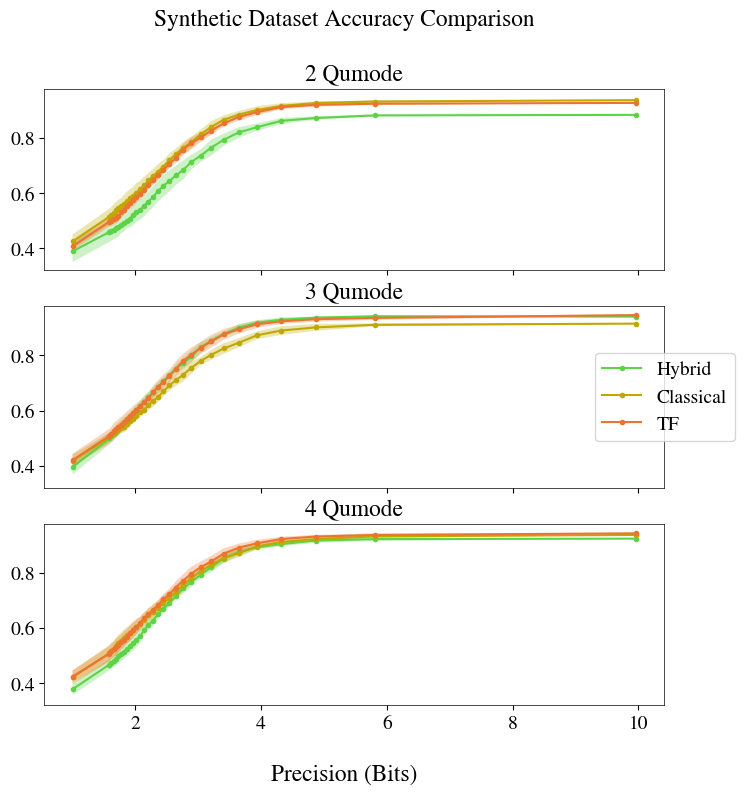

In [4]:
%matplotlib inline
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8), sharex=True, sharey=True)
fig.supxlabel('Precision (Bits)')
fig.suptitle('Synthetic Dataset Accuracy Comparison')
for i in range(2,5):

    mask = (df['network_type']=='quantum') & (df['num_qumodes']==i)

    x1 = np.array(df[mask]['sigma'].unique()).astype(float)
    x1 = np.log2(1+1/x1)

    acc_q = df[mask]['avg_acc']
    acc_err_q = df[mask]['acc_err']
    loss_q = df[mask]['avg_loss']
    loss_err_q = df[mask]['loss_err']

    mask = (df['network_type']=='classical') & (df['num_qumodes']==i)

    x2 = np.array(df[mask]['sigma'].unique()).astype(float)
    x2 = np.log2(1+1/x2)
    
    acc_c = df[mask]['avg_acc']
    acc_err_c = df[mask]['acc_err']
    loss_c = df[mask]['avg_loss']
    loss_err_c = df[mask]['loss_err']
    
    mask = (df['network_type']=='classical_tf') & (df['num_qumodes']==i)

    x3 = np.array(df[mask]['sigma'].unique()).astype(float)
    x3 = np.log2(1+1/x3)
    
    acc_tf = df[mask]['avg_acc']
    acc_err_tf = df[mask]['acc_err']
    loss_tf = df[mask]['avg_loss']
    loss_err_tf = df[mask]['loss_err']
    
    #ax[i-2].grid(True, linestyle=':')
    line_q = ax[i-2].plot(x1, acc_q, marker='.', label='Hybrid')
    ax[i-2].fill_between(x1, acc_q - acc_err_q, acc_q + acc_err_q, interpolate=True, alpha=0.3)
    
    line_c = ax[i-2].plot(x2, acc_c, marker='.', label='Classical')
    ax[i-2].fill_between(x2, acc_c - acc_err_c, acc_c + acc_err_c, interpolate=True, alpha=0.3)
    ax[i-2].set_title(f'{i} Qumode')
    
    line_tf = ax[i-2].plot(x3, acc_tf, marker='.', label='TF')
    ax[i-2].fill_between(x3, acc_tf - acc_err_tf, acc_tf + acc_err_tf, interpolate=True, alpha=0.3)

    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=5)
plt.savefig('../MidWinter/Synthetic_comparison.pdf')

In [54]:
ex_path = "Synthetic_Hybrid_Base_Experiment_100Epochs_2"
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data
config = data[6]['config']
config.pop('__doc__', None)
#config.pop('iteration', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['val_acc'] = np.nan
df['loss'] = np.nan
df['val_loss'] = np.nan
for i in range(1, len(data) + 1):
    try:
        config = data[i]['config']
        config.pop('__doc__', None)
        #config.pop('iteration', None)
        metrics = data[i]['metrics']
        metrics.pop('epoch',None)
        acc, loss, val_acc, val_loss = metrics.values()
        acc = np.array(acc).astype(float)
        assert acc.shape[-1] == 100
        loss = np.array(loss).astype(float)
        val_acc = np.array(val_acc).astype(float)
        val_loss = np.array(val_loss).astype(float)
        df.loc[i] = [*config.values(), acc, val_acc, loss, val_loss]
    except (KeyError, AssertionError):
        print(f"Invalid: {i}")
print(type(df['acc']))
#for i in df['acc'].values:
#    print(i)
df_mean = df.groupby(['network_type', 'num_qumodes']).apply(lambda x: np.mean(x[['acc','val_acc', 'loss', 'val_loss']].values, axis=0))
df_std = df.groupby(['network_type', 'num_qumodes']).apply(lambda x: np.std(x[['acc','val_acc', 'loss', 'val_loss']].values.astype, axis=0))
display(df[(df['network_type'] == 'classical') & (df['num_qumodes']==2)])
display(df_mean['classical', 2])

Invalid: 60
<class 'pandas.core.series.Series'>


AxisError: axis 0 is out of bounds for array of dimension 0

In [5]:

ex_path = "Synthetic_Hybrid_PWB_Experiment_Test"
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data
config = data[6]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['avg_acc'] = np.nan
df['acc_err'] = np.nan
df['avg_loss'] = np.nan
df['loss_err'] = np.nan
for i in range(1, len(data) + 1):
    try:
        config = data[i]['config']
        config.pop('__doc__', None)
        metrics = data[i]['metrics']
        metrics.pop('epoch',None)
        acc, loss = metrics.values()
        avg_acc = np.mean(acc)
        acc_err = np.std(acc)
        avg_loss = np.mean(loss)
        loss_err = np.std(loss)
        df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]
    except KeyError:
        print(f"Invalid: {i}")
   
x = np.array(df['sigma'].unique()).astype(float)
x = np.log2(1+1/x)
plot_df = pd.DataFrame(index=x)
df = df.sort_values('sigma')


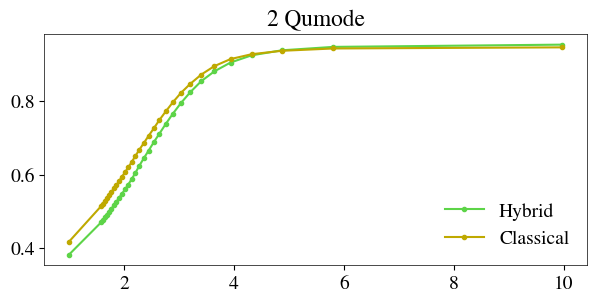

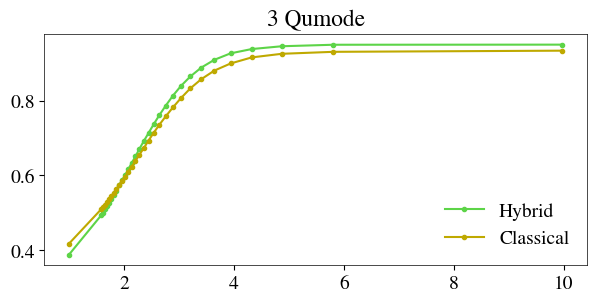

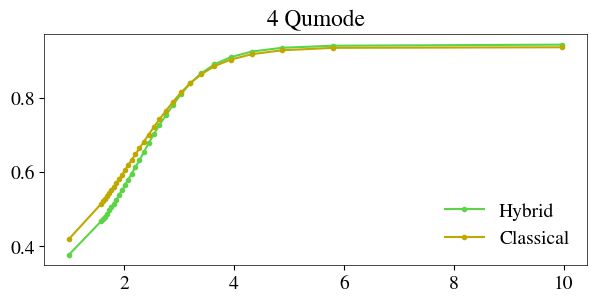

In [6]:
%matplotlib inline

for i in range(2,5):
    fig = plt.figure(
        figsize=(7,3)
    )

    mask = (df['network_type']=='quantum') & (df['num_qumodes']==i)

    x1 = np.array(df[mask]['sigma'].unique()).astype(float)
    x1 = np.log2(1+1/x1)

    acc_q = df[mask]['avg_acc']
    acc_err_q = df[mask]['acc_err']
    loss_q = df[mask]['avg_loss']
    loss_err_q = df[mask]['loss_err']

    mask = (df['network_type']=='classical') & (df['num_qumodes']==i)

    x2 = np.array(df[mask]['sigma'].unique()).astype(float)
    x2 = np.log2(1+1/x2)
    
    acc_c = df[mask]['avg_acc']
    acc_err_c = df[mask]['acc_err']
    loss_c = df[mask]['avg_loss']
    loss_err_c = df[mask]['loss_err']    

    #ax[i-2].grid(True, linestyle=':')
    line_q = plt.plot(x1, acc_q, marker='.', label='Hybrid')
    #plt.fill_between(x1, acc_q - acc_err_q, acc_q + acc_err_q, interpolate=True, alpha=0.3)
    
    line_c = plt.plot(x2, acc_c, marker='.', label='Classical')
    #plt.fill_between(x2, acc_c - acc_err_c, acc_c + acc_err_c, interpolate=True, alpha=0.3)
    plt.title(f'{i} Qumode') 
    plt.legend(frameon=False)
    plt.savefig(f'../Plotting/Synthetic_comparison{i}.pdf')
    plt.show()

In [9]:
%matplotlib inline

for i in range(1, len(data) + 1):
    config = data[i]['config']
    config.pop('__doc__', None)
    metrics = data[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss = metrics.values()
    avg_acc = np.mean(acc)
    acc_err = np.std(acc)
    avg_loss = np.mean(loss)
    loss_err = np.std(loss)
    df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]
   
    
df = df.sort_values('sigma')
x = np.array(df['sigma'].unique()).astype(float)
x = np.log2(1+1/x)
plot_df = pd.DataFrame(index=x)

mask = (df['network_type']=='quantum') & (df['num_qumodes']==4)
acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['Ph Q Acc 4'] = acc_q.values
plot_df['Ph Q Acc Err 4'] = acc_err_q.values
plot_df['Ph Q Loss 4'] = loss_q.values
plot_df['Ph Q Loss Err 4'] = loss_err_q.values
plot_df['Ph C Acc 4'] = acc_c.values
plot_df['Ph C Acc Err 4'] = acc_err_c.values
plot_df['Ph C Loss 4'] = loss_c.values
plot_df['Ph C Loss Err 4'] = loss_err_c.values

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='All Photonic 4 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()


ValueError: Length of values (0) does not match length of index (31)

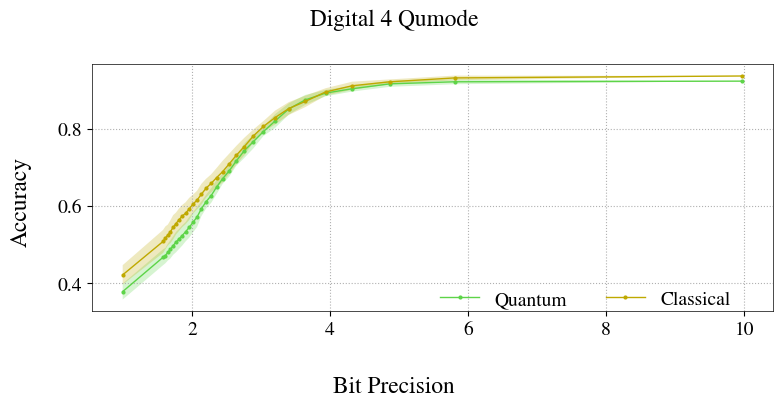

In [9]:
mask = (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']


plot_df['TF Q Acc 4'] = acc_q.values
plot_df['TF Q Acc Err 4'] = acc_err_q.values
plot_df['TF Q Loss 4'] = loss_q.values
plot_df['TF Q Loss Err 4'] = loss_err_q.values
plot_df['TF C Acc 4'] = acc_c.values
plot_df['TF C Acc Err 4'] = acc_err_c.values
plot_df['TF C Loss 4'] = loss_c.values
plot_df['TF C Loss Err 4'] = loss_err_c.values

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='Digital 4 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

<Figure size 800x400 with 0 Axes>

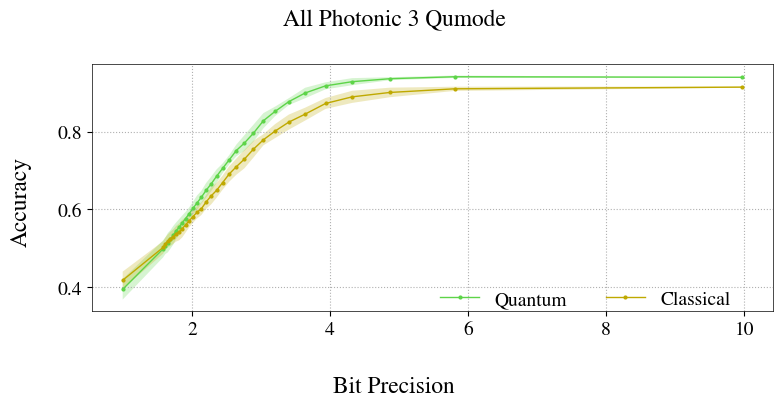

In [10]:
mask = (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['Ph Q Acc 3'] = acc_q.values
plot_df['Ph Q Acc Err 3'] = acc_err_q.values
plot_df['Ph Q Loss 3'] = loss_q.values
plot_df['Ph Q Loss Err 3'] = loss_err_q.values
plot_df['Ph C Acc 3'] = acc_c.values
plot_df['Ph C Acc Err 3'] = acc_err_c.values
plot_df['Ph C Loss 3'] = loss_c.values
plot_df['Ph C Loss Err 3'] = loss_err_c.values

fig = plt.figure(
        figsize= (
                8,4))

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='All Photonic 3 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

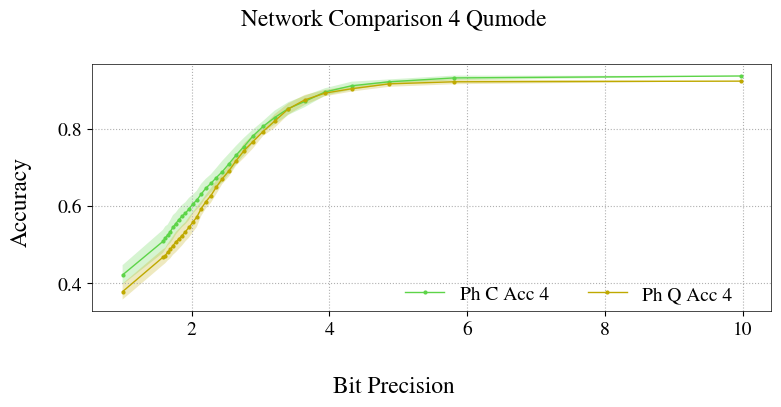

In [11]:
names = ['Ph C Acc 4', 'Ph Q Acc 4']
names_err = [n.split(' ') for n in names]
[names_err[i].insert(-1, 'Err') for i,n in enumerate(names_err)]
names_err = [" ".join(names_err[i]) for i,n in enumerate(names_err)]

Plot = MultiPlot([plot_df.index for i in names], 
                 plot_df[names].values.T,
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=[*names], 
                 yerr=plot_df[names_err].values.T,
                 title='Network Comparison 4 Qumode',
                 legend_position_x=0.45,
                 legend_position_y=0.0)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

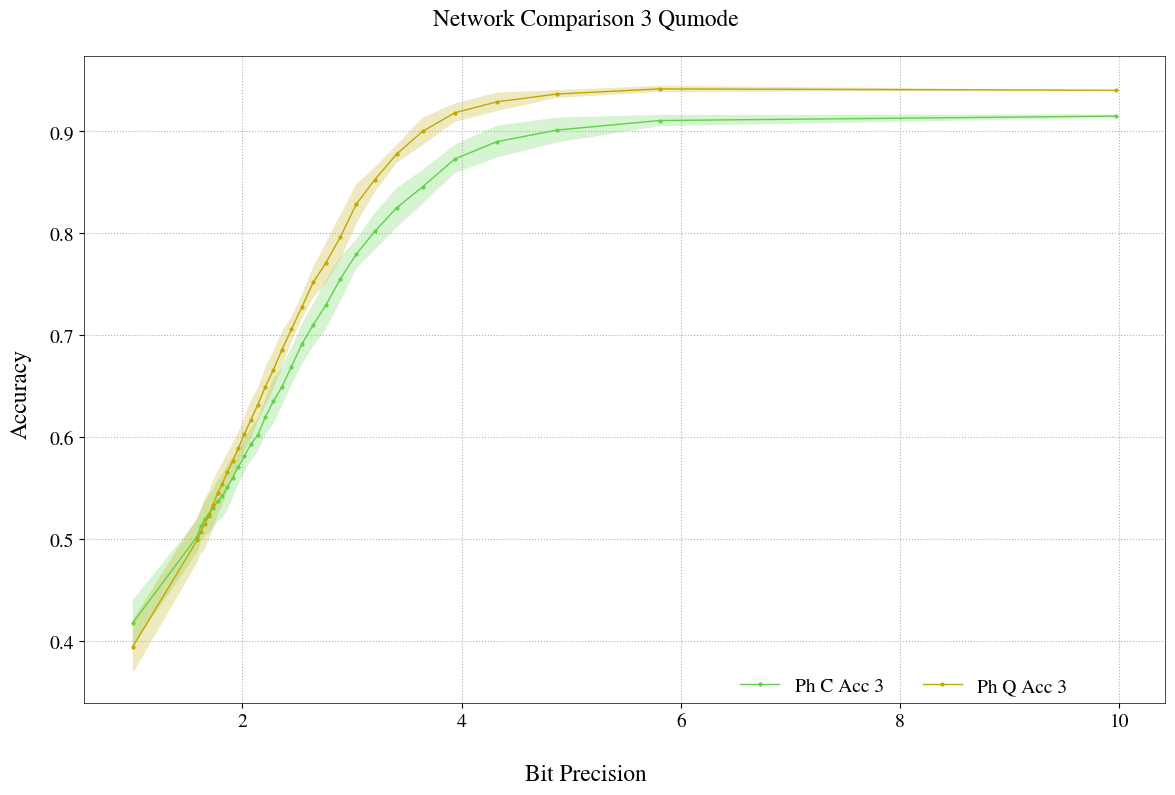

In [12]:
names = ['Ph C Acc 3', 'Ph Q Acc 3']
names_err = [n.split(' ') for n in names]
[names_err[i].insert(-1, 'Err') for i,n in enumerate(names_err)]
names_err = [" ".join(names_err[i]) for i,n in enumerate(names_err)]

Plot = MultiPlot([plot_df.index for i in names], 
                 plot_df[names].values.T,
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=[*names], 
                 yerr=plot_df[names_err].values.T,
                 title='Network Comparison 3 Qumode',
                 legend_position_x=0.6,
                 legend_position_y=0.0)
Plot.options["figure_size_x"] = 12
Plot.options["figure_size_y"] = 8
Plot.plot()

In [13]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder("WINE_Noisy_Train2")
data1 = dbGen.data

config = data1[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['loss'] = np.nan
df['val_acc'] = np.nan
df['val_loss'] = np.nan

for i in range(1, len(data1) + 1):
    config = data1[i]['config']
    config.pop('__doc__', None)
    metrics = data1[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss, val_acc, val_loss = metrics.values()
    acc = np.max(acc)
    loss = np.max(loss)
    val_acc = np.max(val_acc)
    val_loss = np.max(-1)
    df.loc[i] = [*config.values(), acc, loss, val_acc, val_loss]
    
func = lambda x: np.log2(1 + 1/x)
df['sigma'] = df['sigma'].apply(func)
df.set_index('sigma', inplace=True)
df.sort_values('sigma', inplace=True)
df

FileNotFoundError: [Errno 2] No such file or directory: 'WINE_Noisy_Train2'

In [14]:
%matplotlib inline
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)
classical = df[mask]
names = ['acc', 'val_acc']

fig = plt.figure(
    figsize=(10,6))
plt.plot(quantum['acc'], marker='.', color='c', label='Hybrid Training')
plt.plot(quantum['val_acc'], marker='x', color='c', label='Hybrid Testing')
plt.plot(classical['acc'], marker='.', color='r', label='Classical Training')
plt.plot(classical['val_acc'], marker='x', color='r', label='Classical Testing')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Effect of Noise 4 Qumode')
plt.show()

mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==3)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==3)
classical = df[mask]
names = ['acc', 'val_acc']

fig = plt.figure(
    figsize=(10,6))
plt.plot(quantum['acc'], marker='.', color='c', label='Hybrid Training')
plt.plot(quantum['val_acc'], marker='x', color='c', label='Hybrid Testing')
plt.plot(classical['acc'], marker='.', color='r', label='Classical Training')
plt.plot(classical['val_acc'], marker='x', color='r', label='Classical Testing')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Effect of Noise 3 Qumode')

KeyError: 'PWB'

In [15]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder("WINE_Noisy_Train2")
data1 = dbGen.data

config = data1[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['loss'] = np.nan
df['val_acc'] = np.nan
df['val_loss'] = np.nan

for i in range(1, len(data1) + 1):
    config = data1[i]['config']
    config.pop('__doc__', None)
    metrics = data1[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss, val_acc, val_loss = metrics.values()
    df.loc[i] = [*config.values(), acc, loss, val_acc, val_loss]

func = lambda x: np.log2(1 + 1/x)
df['sigma'] = df['sigma'].apply(func)
df.set_index('sigma', inplace=True)
df.sort_values('sigma', inplace=True)

mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)
classical = df[mask]

FileNotFoundError: [Errno 2] No such file or directory: 'WINE_Noisy_Train2'

In [16]:
%matplotlib notebook
fig = plt.figure(
    figsize=(10,10)
)
ax = fig.add_subplot(2,2,1,projection='3d')
epochs = np.arange(1, 101, 1)
acc, val_acc = quantum['acc'].values, classical['val_acc'].values
acc = np.stack(acc)
val_acc = np.stack(val_acc)
prec = quantum.index
X, Y = np.meshgrid(epochs, prec)

ax.plot_surface(X, Y, acc, cmap='viridis', edgecolor='k')

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title("Quantum Training")
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.plot_surface(X, Y, val_acc, cmap='viridis', edgecolor='k')

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title('Quantum Testing')
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,3,projection='3d')

acc = np.stack(classical['acc'])
val_acc = np.stack(classical['val_acc'])
ax.plot_surface(X, Y, acc, cmap='viridis', edgecolor='k')
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title("Classical Training")
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.plot_surface(X, Y, val_acc, cmap='viridis', edgecolor='k')
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title('Classical Testing')
ax.set_zlim(0.4,1)

<IPython.core.display.Javascript object>

NameError: name 'quantum' is not defined